<a href="https://colab.research.google.com/github/hohaithuy/Compare-AlexNet-VGG16-and-SIFT-on-Flowers-Dataset/blob/main/CS231_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import random
import numpy as np

import torchvision
from torchvision import models

import torch
import torch.nn as nn

from PIL import Image


In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [ ]:
vgg16 = models.vgg16(pretrained=True)
#remove last fully-connected layer
# new_classifier = nn.Sequential(*list(vgg16.classifier.children())[:-1])
# vgg16.classifier = new_classifier

# #Updating the second classifier
# alexnet.classifier[4] = nn.Linear(4096,1024)

# #Updating the third and the last classifier that is the output layer of the network. Make sure to have 2 output nodes if we are going to get 2 class labels through our model.
# alexnet.classifier[6] = nn.Linear(1024,2)


In [ ]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# # Freeze feature
# for param in alexnet.features:
#   param.requires_grad = False

In [ ]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(227),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.4914, 0.4822, 0.4465], 
 std=[0.2023, 0.1994, 0.2010]
 )
])

In [ ]:
import os

path = '/content/gdrive/MyDrive/flowers/'

fulldata = []

classes = os.listdir(path)
label = 0

for folder in classes:
  print(f"{folder} : {label}")
  files = sorted(os.listdir(path + folder))[:300]
  sub_data =[(torch.unsqueeze(transform(Image.open(path + folder + '/' + i).convert('RGB')), 0), label) for i in files]
  if len(fulldata) == 0: fulldata = sub_data
  else: fulldata += sub_data
  label += 1


daisy : 0
dandelion : 1
rose : 2
sunflower : 3
tulip : 4
lotusflower : 5


In [ ]:
random.shuffle(fulldata)

In [ ]:
img = Image.open('/content/gdrive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg')
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)
out = vgg16(fulldata[15][0])
out.detach().numpy().reshape(-1, )

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


array([0.      , 0.      , 0.      , ..., 0.      , 2.182042, 0.      ],
      dtype=float32)

In [ ]:
#X = numpy.empty(shape, dtype=float, order='C', *, like=None)
X = []
y = []

for i in fulldata:
  out = vgg16(i[0])
  X.append(out.detach().numpy())
  y.append(i[1])


In [ ]:
X = np.array(X)


In [ ]:
X.shape

(1800, 1, 4096)

In [ ]:
X = np.reshape(X, (X.shape[0], X.shape[2]))

In [ ]:
X.shape

(1800, 4096)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict, target_names=classes))
print( confusion_matrix(y_test, y_predict))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

       daisy       0.88      0.83      0.86       111
   dandelion       0.85      0.77      0.81        91
        rose       0.76      0.79      0.78       102
   sunflower       0.78      0.84      0.81        94
       tulip       0.75      0.74      0.75       105
 lotusflower       0.91      0.96      0.93        91

    accuracy                           0.82       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.82      0.82      0.82       594

[[92  7  2  7  1  2]
 [ 3 70  2 10  5  1]
 [ 3  1 81  0 13  4]
 [ 5  4  2 79  4  0]
 [ 1  0 19  5 78  2]
 [ 0  0  1  0  3 87]]
0.8198653198653199


#Test

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [ ]:
def Experiment(X, y, model_used):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  clf = model_used
  clf.fit(X_train, y_train)

  y_predict = clf.predict(X_test)

  from sklearn.metrics import classification_report, confusion_matrix
  print(classification_report(y_test, y_predict, target_names=classes))
  print( confusion_matrix(y_test, y_predict))
  from sklearn.metrics import accuracy_score
  print(accuracy_score(y_test,y_predict))


  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(confusion_matrix(y_test, y_predict), classes=classes,
                        title='Confusion matrix, without normalization')
  # Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(confusion_matrix(y_test, y_predict), classes=classes, normalize=True,
                        title='Normalized confusion matrix')
  plt.show()


####Running

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

       daisy       0.89      0.85      0.87       111
   dandelion       0.84      0.84      0.84        91
        rose       0.78      0.79      0.79       102
   sunflower       0.83      0.82      0.82        94
       tulip       0.74      0.75      0.75       105
 lotusflower       0.87      0.89      0.88        91

    accuracy                           0.82       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.82      0.82      0.82       594

[[94  7  3  3  3  1]
 [ 2 76  2  8  1  2]
 [ 2  1 81  0 14  4]
 [ 6  6  1 77  3  1]
 [ 1  1 15  5 79  4]
 [ 1  0  2  0  7 81]]
0.8215488215488216


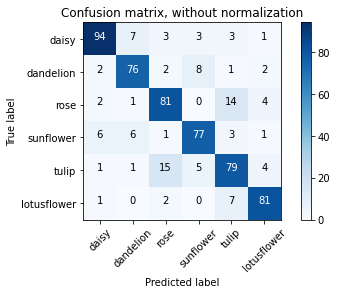

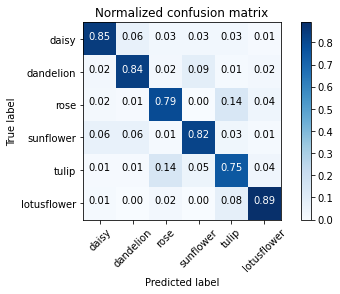

In [ ]:
#Logistic Regression
Experiment(X, y, LogisticRegression())

              precision    recall  f1-score   support

       daisy       0.92      0.82      0.87       111
   dandelion       0.84      0.77      0.80        91
        rose       0.76      0.80      0.78       102
   sunflower       0.77      0.86      0.81        94
       tulip       0.75      0.73      0.74       105
 lotusflower       0.91      0.96      0.93        91

    accuracy                           0.82       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.82      0.82      0.82       594

[[91  7  2  8  1  2]
 [ 2 70  2 11  5  1]
 [ 2  1 82  0 13  4]
 [ 3  4  2 81  4  0]
 [ 1  1 19  5 77  2]
 [ 0  0  1  0  3 87]]
0.8215488215488216


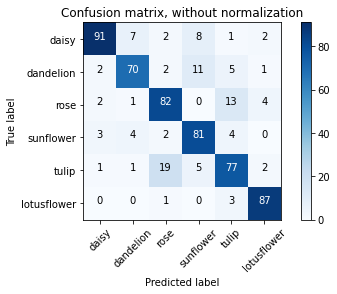

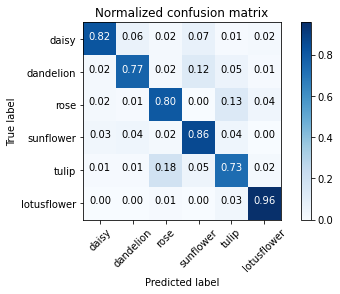

In [ ]:
#SVM
Experiment(X, y, SVC(gamma='auto'))

              precision    recall  f1-score   support

       daisy       0.79      0.56      0.66       111
   dandelion       0.76      0.64      0.69        91
        rose       0.46      0.66      0.54       102
   sunflower       0.62      0.64      0.63        94
       tulip       0.43      0.59      0.50       105
 lotusflower       0.89      0.54      0.67        91

    accuracy                           0.60       594
   macro avg       0.66      0.60      0.62       594
weighted avg       0.66      0.60      0.61       594

[[62  8 11 15 12  3]
 [ 3 58 13  8  9  0]
 [ 2  1 67  4 28  0]
 [ 5  6  9 60 13  1]
 [ 1  2 32  6 62  2]
 [ 5  1 13  4 19 49]]
0.6026936026936027


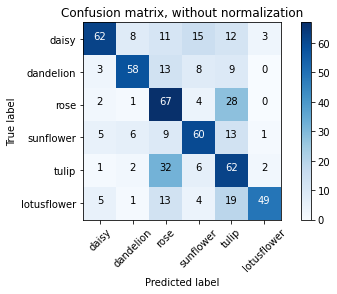

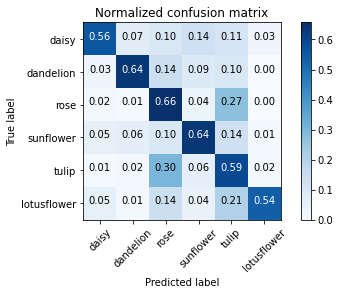

In [ ]:
#Naive Bayes
Experiment(X, y, GaussianNB())

              precision    recall  f1-score   support

       daisy       0.57      0.57      0.57       111
   dandelion       0.42      0.45      0.44        91
        rose       0.45      0.40      0.42       102
   sunflower       0.43      0.46      0.44        94
       tulip       0.42      0.38      0.40       105
 lotusflower       0.50      0.55      0.52        91

    accuracy                           0.47       594
   macro avg       0.47      0.47      0.47       594
weighted avg       0.47      0.47      0.47       594

[[63 23  6  8  1 10]
 [ 6 41  5 23  9  7]
 [ 7  7 41  7 28 12]
 [16 13  7 43  8  7]
 [ 8  9 22 12 40 14]
 [10  4 10  7 10 50]]
0.468013468013468


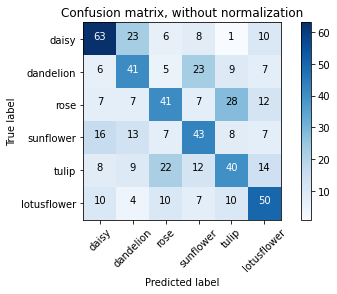

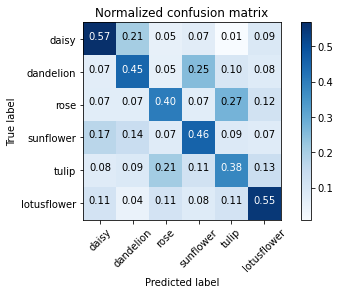

In [ ]:
#Decision Tree
Experiment(X, y, DecisionTreeClassifier())

              precision    recall  f1-score   support

       daisy       0.90      0.82      0.86       111
   dandelion       0.82      0.76      0.79        91
        rose       0.76      0.66      0.71       102
   sunflower       0.67      0.87      0.76        94
       tulip       0.73      0.66      0.69       105
 lotusflower       0.81      0.93      0.87        91

    accuracy                           0.78       594
   macro avg       0.78      0.78      0.78       594
weighted avg       0.79      0.78      0.78       594

[[91  6  2  8  0  4]
 [ 1 69  2 14  4  1]
 [ 2  3 67  6 18  6]
 [ 5  4  1 82  2  0]
 [ 1  2 14 10 69  9]
 [ 1  0  2  2  1 85]]
0.7794612794612794


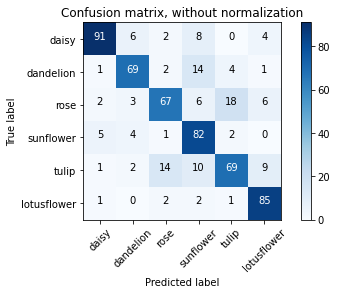

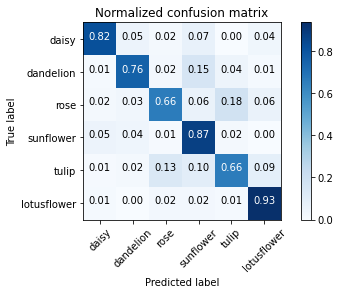

In [ ]:
#Random Forest
Experiment(X, y, RandomForestClassifier())

              precision    recall  f1-score   support

       daisy       1.00      0.19      0.32       111
   dandelion       0.54      0.77      0.63        91
        rose       0.37      0.65      0.47       102
   sunflower       0.45      0.14      0.21        94
       tulip       0.83      0.10      0.17       105
 lotusflower       0.37      0.90      0.52        91

    accuracy                           0.44       594
   macro avg       0.59      0.46      0.39       594
weighted avg       0.61      0.44      0.38       594

[[21 22 10 14  2 42]
 [ 0 70 11  1  0  9]
 [ 0  5 66  1  0 30]
 [ 0 27 33 13  0 21]
 [ 0  6 51  0 10 38]
 [ 0  0  9  0  0 82]]
0.44107744107744107


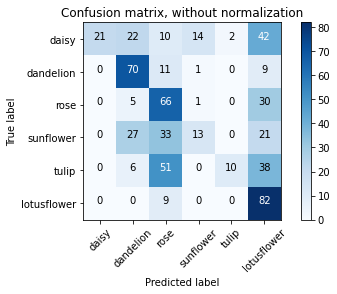

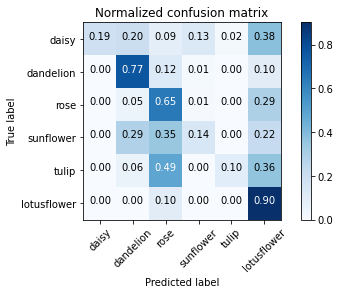

In [ ]:
#KNeighborsClassifier
Experiment(X, y, KNeighborsClassifier())

              precision    recall  f1-score   support

       daisy       0.88      0.83      0.85       111
   dandelion       0.81      0.76      0.78        91
        rose       0.77      0.72      0.74       102
   sunflower       0.79      0.73      0.76        94
       tulip       0.61      0.82      0.70       105
 lotusflower       0.87      0.78      0.82        91

    accuracy                           0.77       594
   macro avg       0.79      0.77      0.78       594
weighted avg       0.79      0.77      0.78       594

[[92  6  3  4  4  2]
 [ 2 69  2  9  7  2]
 [ 2  1 73  1 22  3]
 [ 7  7  2 69  8  1]
 [ 1  1 12  2 86  3]
 [ 1  1  3  2 13 71]]
0.7744107744107744


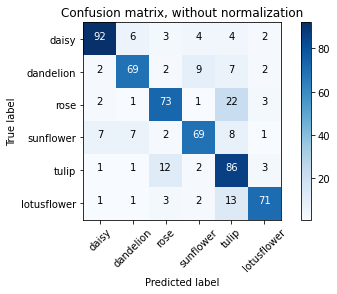

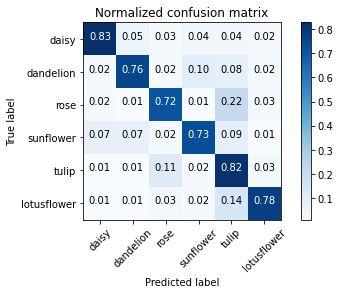

In [ ]:
#SGDClassifier
Experiment(X, y, SGDClassifier())